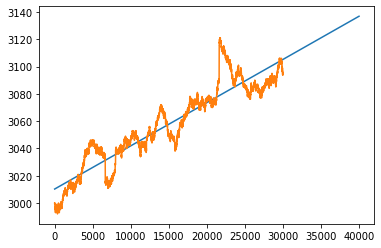

In [1]:
import pandas as pd
import scipy as scp
from scipy import stats, optimize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statistics as stat
import math as m



def linear_function(x, a, b):
    return (a*x)+b

diving_gear_price_data = pd.read_csv('diving_gear_orderbook_data_all.csv', delimiter= ";")
dolphin_sightings_data = pd.read_csv('dolphin_sightings_orderbook_data_all.csv', delimiter=";")

dolphin_sightings_data = dolphin_sightings_data.drop(['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'profit_and_loss', 'day', 'timestamp'], axis=1)
dolphin_sightings_data_list = dolphin_sightings_data['mid_price'].to_list()

diving_gear_price_data = diving_gear_price_data.drop(['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'profit_and_loss', 'day', 'timestamp'], axis=1)

popt, pcov = optimize.curve_fit(linear_function, [*range(0, 30000)], dolphin_sightings_data_list)
timestamps = np.linspace(0, 40000, 40000)


plt.plot(linear_function(timestamps, popt[0], popt[1]))
plt.plot(dolphin_sightings_data_list)


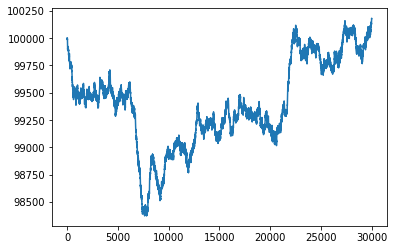

In [2]:
plt.plot(diving_gear_price_data)



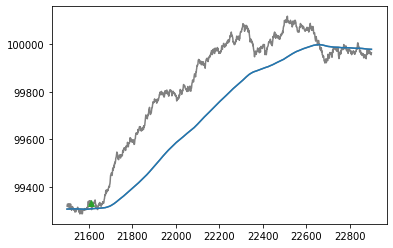

In [4]:

#df_log=np.log(dolphin_sightings_data)
df_diff=dolphin_sightings_data.diff().dropna()

df_diff = df_diff[df_diff.mid_price != 0]
df_diff = df_diff[df_diff.mid_price != -1]
df_diff = df_diff[df_diff.mid_price != 1]
df_diff = df_diff[df_diff.mid_price != -2]
df_diff = df_diff[df_diff.mid_price != 2]
df_diff = df_diff[df_diff.mid_price != -3]
df_diff = df_diff[df_diff.mid_price != 3]
df_diff = df_diff[df_diff.mid_price != -4]
df_diff = df_diff[df_diff.mid_price != 4]
df_diff = df_diff[df_diff.mid_price != -5]
df_diff = df_diff[df_diff.mid_price != 5]


signals = diving_gear_price_data.loc[list((df_diff['mid_price'].index))]['mid_price']

#print(signals)
#print(df_diff)

df3 = pd.concat([df_diff, signals], axis=1)
df3.columns = ['signal', 'mid_price']


diving_gear_price_data['EMA'] = diving_gear_price_data['mid_price'].ewm(span=500, adjust=False).mean()
#print(diving_gear_price_data['EMA'][22650:22700])


pos, neg = [x for _, x in df3.groupby(df3['signal'] < 0)]

plt.plot(diving_gear_price_data[21500:22000], color= 'gray')
plt.plot(neg['mid_price'][1:], 'v', color='red')
plt.plot(pos['mid_price'][2:], '^', color='tab:green')
plt.plot(diving_gear_price_data['EMA'][21500:2200])


